## 1) Importing Necessary Libraries

In [ ]:
import cv2 
import os 
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 2) Inspection of GPU avaiability

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU is available")
    print('Device name:', torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print("GPU not availabl,")

GPU is available
Device name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


## 3) Data Preprocessing 
### Resizing the images to 640x640 resolution

In [ ]:
dataset_path = "dataset"
dataset_image_size = (640,640)

# resizing all the train valid and test dataset 
for split in  ['train', 'valid', 'test']:
    # images folder path
    folder = os.path.join(dataset_path, split,"images")

    for image_name in os.listdir(folder):
        # check if the file is an image
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):

            image_path = os.path.join(folder, image_name)
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            # Check if the image was readed  successfully
            if image is None:
                print(f"Error reading image: {image_path}")
                continue
            
            # Resize the image to the desired size
            resized_image = cv2.resize(image, dataset_image_size)
            
            # Save the resized image back to the same path
            cv2.imwrite(image_path, resized_image)
            print(f"Resized and saved: {image_path}")


Resized and saved: dataset\train\images\0622_1059_jpg.rf.3866bdae943b94b1c9ffc8bb6046458a.jpg
Resized and saved: dataset\train\images\0622_1334_jpg.rf.4c71cd76147a60ee172d15b2a7a81aee.jpg
Resized and saved: dataset\train\images\0622_1335_jpg.rf.53e379d169b7472029589fc624af7de6.jpg
Resized and saved: dataset\train\images\0622_16380_jpg.rf.2b779a56c0af58d8c4f1429d9ef96610.jpg
Resized and saved: dataset\train\images\0622_17327_jpg.rf.5a628eacedbe34d100a87e93c752a40e.jpg
Resized and saved: dataset\train\images\0622_17425_jpg.rf.c5b205c8ba8c533586e0f5bc5a93ede7.jpg
Resized and saved: dataset\train\images\0622_176_jpg.rf.dc34a1ed69e53bc765a8929c82380f8c.jpg
Resized and saved: dataset\train\images\0622_195_jpg.rf.4bfce075621f39c05f33d0dbfd79cd0c.jpg
Resized and saved: dataset\train\images\0622_19664_jpg.rf.794b68fe0d4464d6f19c3abc2bd5dad6.jpg
Resized and saved: dataset\train\images\0622_20426_jpg.rf.cc2ff8f7476b30d19c795ce2c853e93c.jpg
Resized and saved: dataset\train\images\0622_405_jpg.rf.e

## 5) Yolo model Initialization 

In [4]:
yolo_model = YOLO('yolov8s.pt') # loading the yolo v8 small model

## 6) Training the YOLO model 

### The yolo model is fine tune on the custom data with custom parameter initialization 

In [66]:
yolo_model.train(
    data='E:/road_pothole_detection/dataset/data.yaml',  # Path to the dataset YAML file 
    epochs=40,                # Number of training epochs
    imgsz=640,                # Image size (e.g., 640x640)
    batch=8,                 # Batch size
    name='yolov8s_pothole',
    project='E:/road_pothole_detection',
    lr0=0.001,                # learning rate
    optimizer='Adam',         # Use Adam optimizer
    workers=4,          # Number of worker  for loading data
    device=0,        # Using GPU for training 
    save_period=6                 # Save version after every 6 epochs
)

New https://pypi.org/project/ultralytics/8.3.128 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.115  Python-3.11.9 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=E:/road_pothole_detection/dataset/data.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=6, cache=False, device=0, workers=4, project=E:/road_pothole_detection, name=yolov8s_pothole2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning E:\road_pothole_detection\dataset\train\labels.cache... 741 images, 14 backgrounds, 0 corrupt: 100%|██████████| 741/741 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 58, len(boxes) = 1708. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.10.0 ms, read: 461.9142.7 MB/s, size: 161.7 KB)


val: Scanning E:\road_pothole_detection\dataset\valid\labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<?, ?it/s]


Plotting labels to E:\road_pothole_detection\yolov8s_pothole2\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to E:\road_pothole_detection\yolov8s_pothole2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.93G      2.534      2.649      2.255         28        640: 100%|██████████| 93/93 [00:23<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]

                   all        159        561      0.633      0.152      0.231     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.93G        2.2      2.172      2.015         17        640: 100%|██████████| 93/93 [00:19<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.58it/s]

                   all        159        561      0.417      0.382      0.335      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      1.96G      2.041      2.038      1.955         22        640: 100%|██████████| 93/93 [00:19<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]

                   all        159        561      0.504      0.391      0.372       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.96G      2.011       1.99      1.919         19        640: 100%|██████████| 93/93 [00:19<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        159        561      0.485      0.433      0.399      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.96G      1.965      1.942      1.934         16        640: 100%|██████████| 93/93 [00:19<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

                   all        159        561      0.432      0.419      0.347       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      1.96G      1.908      1.861      1.873         11        640: 100%|██████████| 93/93 [00:19<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]

                   all        159        561      0.587      0.369      0.426       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.96G      1.903      1.856      1.844          5        640: 100%|██████████| 93/93 [00:19<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        159        561      0.496      0.446      0.394      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      1.97G       1.82      1.759      1.797         21        640: 100%|██████████| 93/93 [00:18<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]

                   all        159        561       0.47      0.422      0.405       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.97G      1.853      1.823      1.824         14        640: 100%|██████████| 93/93 [00:18<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]

                   all        159        561      0.524      0.455      0.424      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      1.97G      1.779      1.718      1.786         13        640: 100%|██████████| 93/93 [00:18<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]

                   all        159        561       0.55      0.439      0.426      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      1.97G      1.826      1.738      1.817         15        640: 100%|██████████| 93/93 [00:18<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        159        561      0.509      0.455       0.42      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.97G      1.807      1.674      1.759         21        640: 100%|██████████| 93/93 [00:18<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        159        561      0.561       0.49      0.471      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.97G      1.745      1.614       1.73          8        640: 100%|██████████| 93/93 [00:18<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

                   all        159        561      0.602      0.437      0.467      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.97G      1.748      1.604       1.73         11        640: 100%|██████████| 93/93 [00:18<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

                   all        159        561      0.601      0.494      0.478      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.97G      1.728      1.584      1.722          9        640: 100%|██████████| 93/93 [00:19<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        159        561      0.607      0.419      0.444      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.97G      1.728      1.603      1.726         25        640: 100%|██████████| 93/93 [00:18<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        159        561      0.561      0.414      0.446      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      1.97G       1.72       1.59      1.715         20        640: 100%|██████████| 93/93 [00:18<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]

                   all        159        561      0.525      0.446      0.445      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.97G      1.687      1.589      1.732         22        640: 100%|██████████| 93/93 [00:18<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        159        561      0.592      0.487       0.47      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      1.97G      1.722      1.549      1.708         28        640: 100%|██████████| 93/93 [00:18<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        159        561      0.574       0.44      0.489      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.97G      1.673      1.512      1.714         16        640: 100%|██████████| 93/93 [00:18<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.58it/s]

                   all        159        561       0.47      0.446      0.373      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.97G      1.629      1.475      1.659         18        640: 100%|██████████| 93/93 [00:18<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]

                   all        159        561      0.559       0.46      0.467      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      1.97G      1.628      1.407      1.651         14        640: 100%|██████████| 93/93 [00:18<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.78it/s]

                   all        159        561      0.589      0.472      0.465      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      1.97G      1.619       1.42      1.655         25        640: 100%|██████████| 93/93 [00:18<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]

                   all        159        561       0.62      0.451      0.486      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.97G      1.633      1.428      1.656         14        640: 100%|██████████| 93/93 [00:17<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        159        561      0.546      0.482      0.472      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.97G      1.567      1.372      1.612         16        640: 100%|██████████| 93/93 [00:18<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        159        561      0.592      0.465      0.468      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      1.97G      1.589       1.38      1.609         18        640: 100%|██████████| 93/93 [00:18<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]

                   all        159        561      0.518      0.456      0.435      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      1.97G      1.588      1.349      1.606         28        640: 100%|██████████| 93/93 [00:18<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        159        561      0.505      0.496      0.419      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.97G      1.562      1.341      1.595         17        640: 100%|██████████| 93/93 [00:18<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.67it/s]

                   all        159        561      0.595      0.422      0.445      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      1.97G      1.563      1.342      1.607         36        640: 100%|██████████| 93/93 [00:18<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]

                   all        159        561      0.544      0.434      0.422      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.97G      1.506      1.308      1.571         14        640: 100%|██████████| 93/93 [00:18<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        159        561       0.55      0.471      0.451      0.166


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.97G      1.556      1.223      1.618         15        640: 100%|██████████| 93/93 [00:18<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]

                   all        159        561      0.556      0.452      0.445      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.97G      1.527      1.161      1.606          7        640: 100%|██████████| 93/93 [00:18<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.81it/s]

                   all        159        561      0.539      0.446      0.412      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.97G      1.483      1.121      1.569          6        640: 100%|██████████| 93/93 [00:18<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.75it/s]

                   all        159        561      0.548      0.449      0.424       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      1.97G      1.461      1.082      1.563          9        640: 100%|██████████| 93/93 [00:18<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.80it/s]

                   all        159        561      0.549      0.467      0.439      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      1.97G      1.463      1.099      1.575          9        640: 100%|██████████| 93/93 [00:18<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        159        561      0.532      0.463      0.433      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      1.97G      1.438      1.056      1.552          7        640: 100%|██████████| 93/93 [00:18<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        159        561      0.549       0.46      0.437      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      1.97G      1.432      1.051       1.54          6        640: 100%|██████████| 93/93 [00:18<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]

                   all        159        561      0.584      0.451       0.45      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      1.97G      1.406      1.017      1.517          6        640: 100%|██████████| 93/93 [00:18<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

                   all        159        561       0.54      0.481      0.455      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      1.97G      1.405      1.008      1.519         13        640: 100%|██████████| 93/93 [00:18<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.68it/s]

                   all        159        561      0.532      0.469      0.444      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.97G      1.379      1.012      1.528         20        640: 100%|██████████| 93/93 [00:18<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]

                   all        159        561      0.559      0.434      0.416      0.155



40 epochs completed in 0.245 hours.
Optimizer stripped from E:\road_pothole_detection\yolov8s_pothole2\weights\last.pt, 22.5MB
Optimizer stripped from E:\road_pothole_detection\yolov8s_pothole2\weights\best.pt, 22.5MB

Validating E:\road_pothole_detection\yolov8s_pothole2\weights\best.pt...
Ultralytics 8.3.115  Python-3.11.9 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]


                   all        159        561      0.574      0.439      0.489      0.186
Speed: 1.0ms preprocess, 5.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to E:\road_pothole_detection\yolov8s_pothole2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002E0CE100A50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

## 7) Loading the fine tuned YOLO model for performation evaluation

In [ ]:


model = YOLO('yolov8s_pothole2/weights/best.pt') # loading the fine tuned model 
metrics = model.val()  # Validate the model on the validation set
print (metrics)


Ultralytics 8.3.115  Python-3.11.9 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 858.3176.8 MB/s, size: 171.3 KB)


val: Scanning E:\road_pothole_detection\dataset\valid\labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<?, ?it/s]


## 8) Model Evaluation 

### 8.1) Confusion Matrix

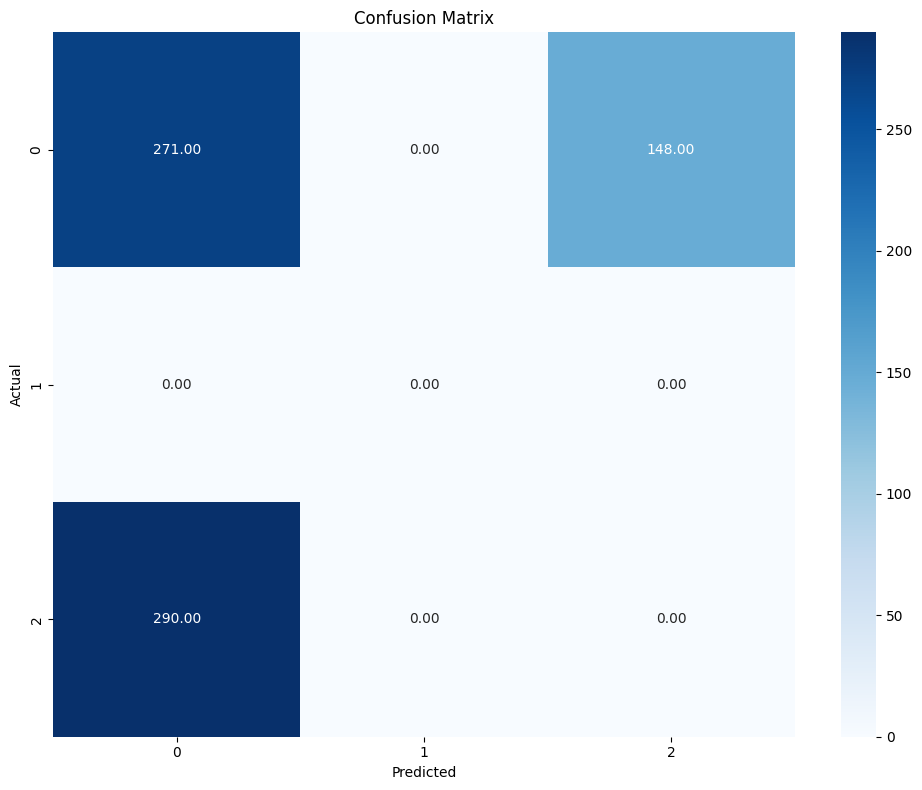

In [ ]:
conf_matrix = metrics.confusion_matrix
conf_matrix_array = conf_matrix.matrix
plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(conf_matrix_array, annot=True, fmt=".2f", cmap='Blues') # Create a heatmap using seaborn
plt.xlabel('Predicted') # X-axis label
plt.ylabel('Actual') # Y-axis label
plt.title('Confusion Matrix') # Title of the plot#
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show() # Display the confusion matrix plot

### 8.2) Mean Average Precision 

In [27]:
print("\nMean Average Precision (mAP):")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")



Mean Average Precision (mAP):
mAP@0.5: 0.4791
mAP@0.5:0.95: 0.1858


### 8.3) Precision Recall Curve 


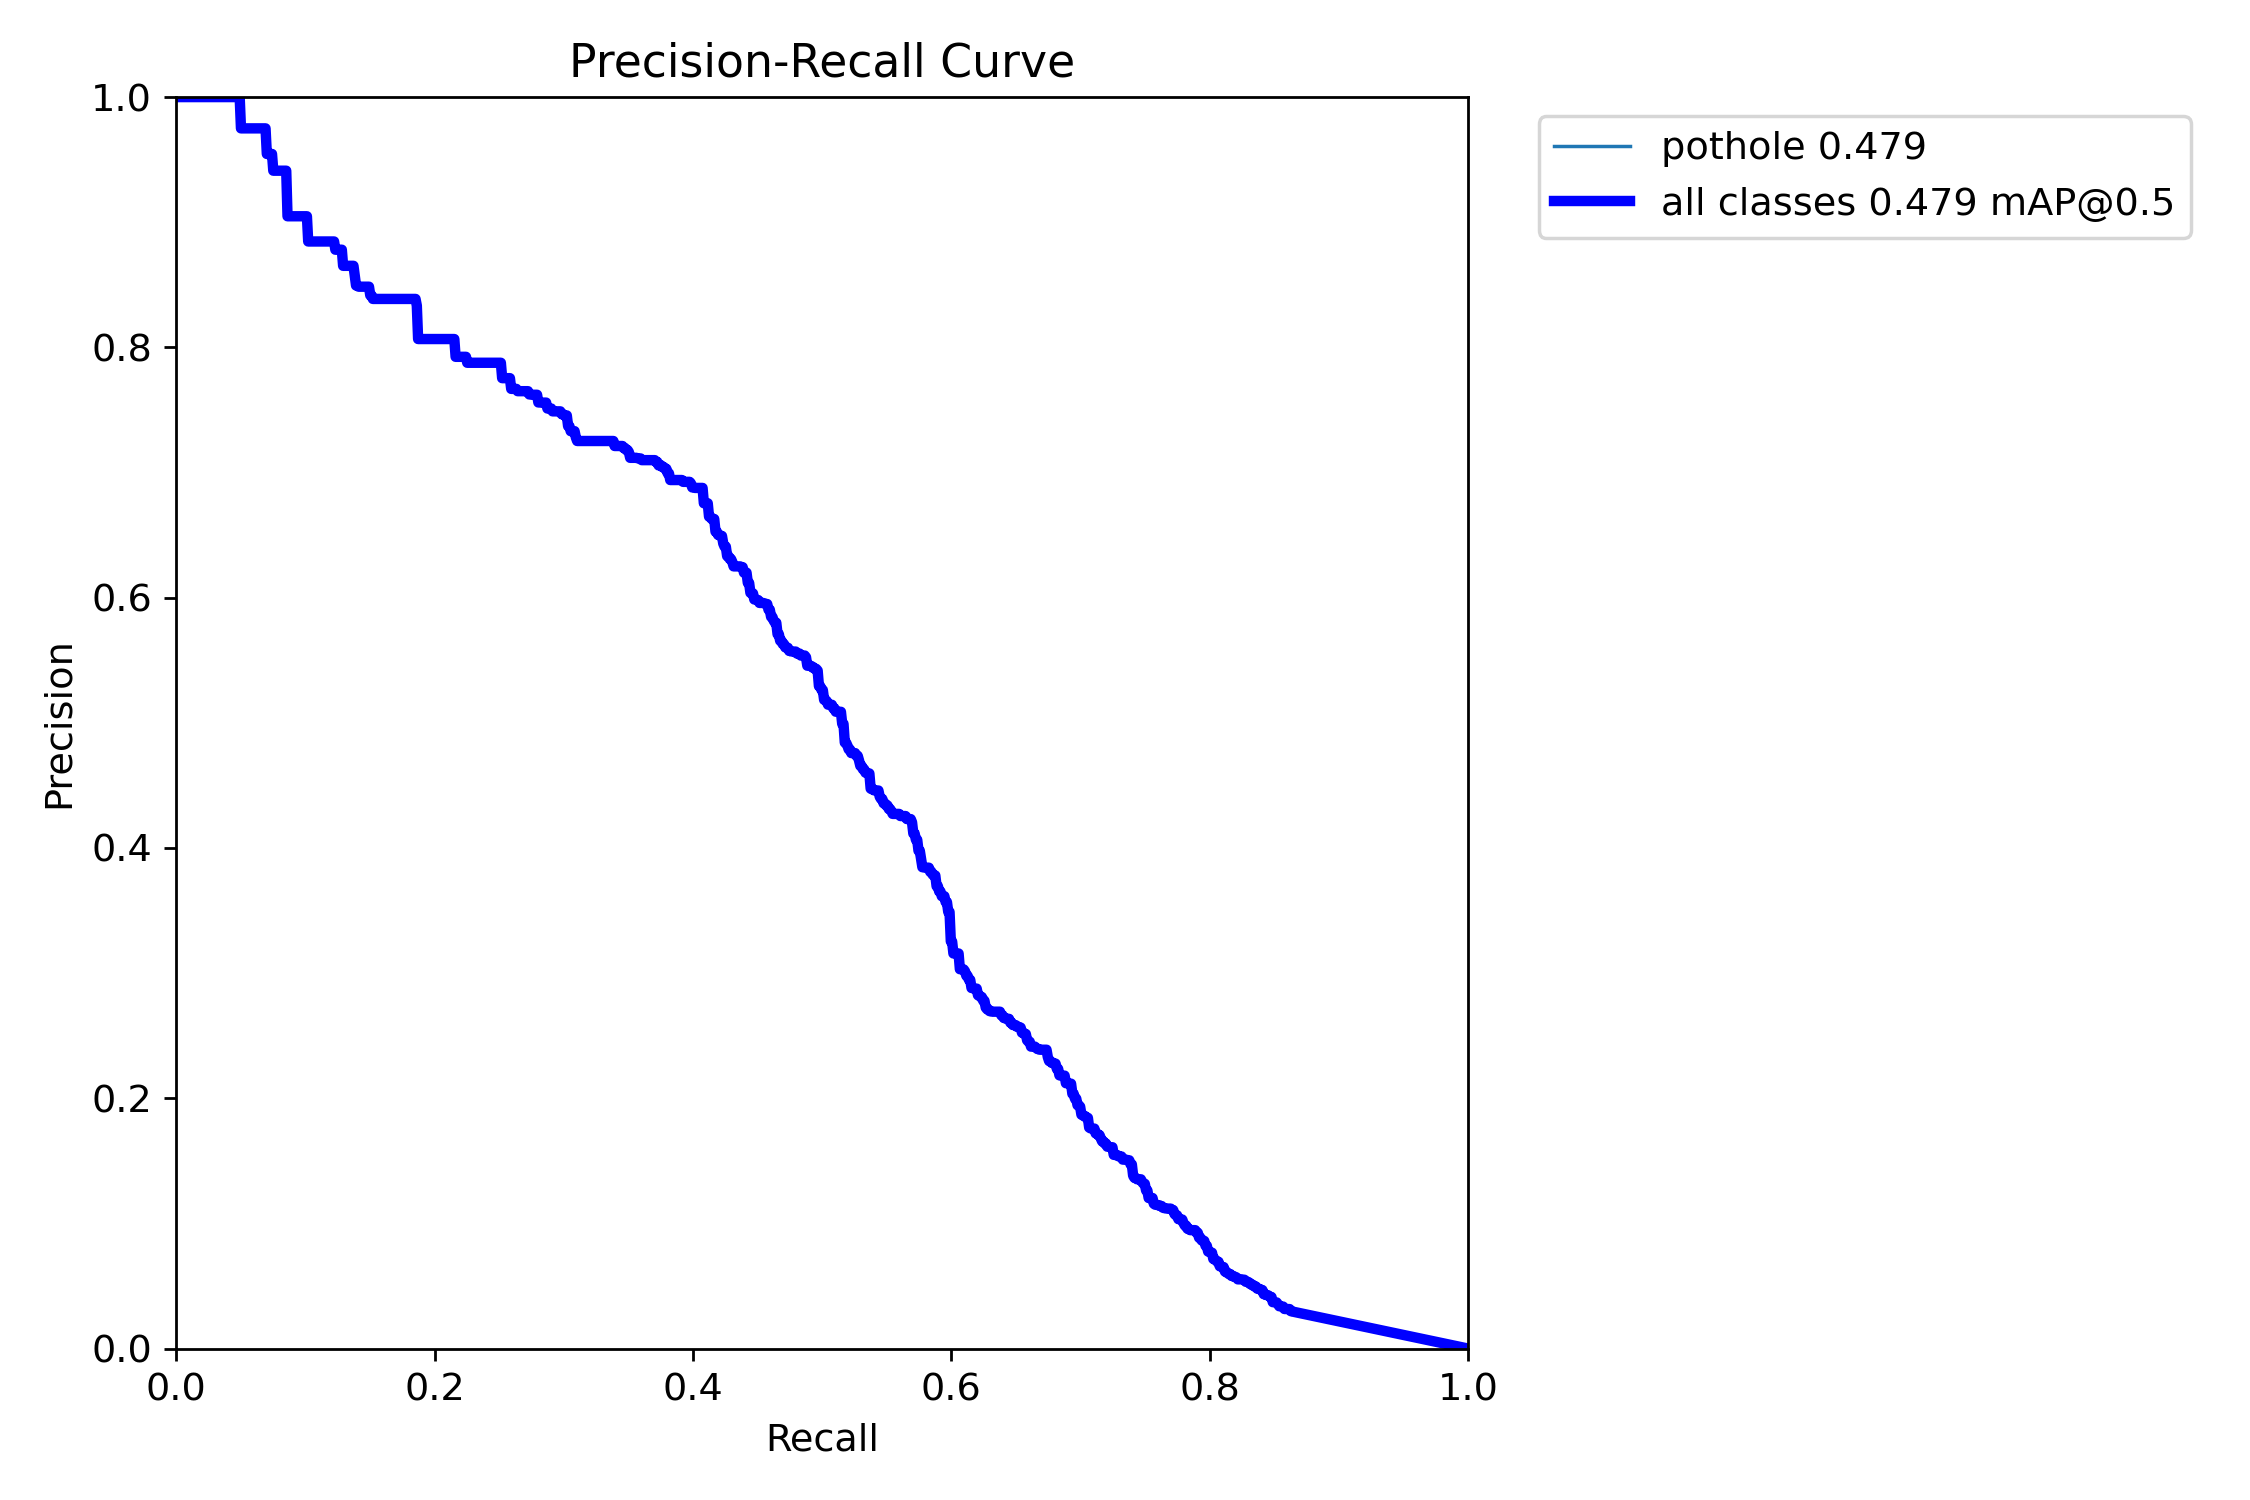

In [62]:
img = Image.open('runs\detect\yolov8s_pothole\PR_curve.png')
display(img)

## 9) Testing on test data

In [60]:

image_path = 'E:/road_pothole_detection/dataset/test/images/img-6_jpg.rf.2cba45c3bc66daf4666f0607b1f03665.jpg' 

results = model.predict(image_path,save=True,project='E:/road_pothole_detection',name='test_results'  )
saved_image_path = os.path.join("test_results", os.path.basename(image_path))



image 1/1 E:\road_pothole_detection\dataset\test\images\img-6_jpg.rf.2cba45c3bc66daf4666f0607b1f03665.jpg: 640x640 3 potholes, 156.0ms
Speed: 5.5ms preprocess, 156.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to E:\road_pothole_detection\test_results


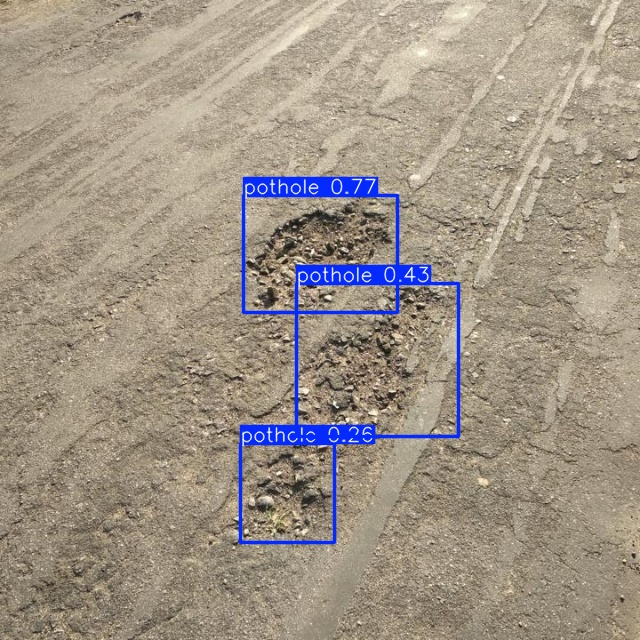

In [61]:
img = Image.open(saved_image_path)
display(img)